## Exploratory Data Analysis Project

### As a Data Analyst, I want to set up the proper imports to have access to  Pandas, MatPlotLib and MySQL Connector

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression

### As a Data Analyst, I want to use MySQL Connector to establish my remote data source andquery my database to JOIN the informatoin from the Sales and Cities tables together and save the result as my DataFrame

In [4]:
mydb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com",database="salesdb",user="root",password="D3v$tudent",use_pure=True)


### As a Data Analyst, I want to query my database to JOIN the information from the 'sales' and 'cities' tables together and save the result as a single DataFrame variable

In [5]:
select_query = "SELECT * FROM sales JOIN cities ON sales.City_ID = cities.City_ID"
df = pd.read_sql_query(select_query, mydb)
df.head()

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\1077266248.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(select_query, mydb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,Seattle


### As a Data Analyst, I want to perform any necessary 'cleaning' of the data to remove NULL values, convert to Pandas 'DateTime' format and remove any duplicate rows

In [6]:
filtered_df = df.drop(["Sales_Tax", "Time"], axis = 1)
filtered_df["Date"] = pd.to_datetime(filtered_df["Date"])
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Total          1000 non-null   float64       
 7   Date           1000 non-null   datetime64[ns]
 8   Payment        1000 non-null   object        
 9   COGS           1000 non-null   float64       
 10  Gross_Income   1000 non-null   float64       
 11  Rating         1000 non-null   float64       
 12  City_ID        1000 non-null   int64         
 13  City           1000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 109.5

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,Ewallet,42.96,2.1480,6.6,1,Seattle


### As a Data Analyst, I want to check for duplicate rows

In [7]:
filtered_df[filtered_df.duplicated()]

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City


### As a Data Analyst, I want to explore the data to answer the following:
* How many sales were made for members vs. normal customers?

In [8]:
customer_query = "SELECT Customer_Type, COUNT(*) AS count FROM sales GROUP BY Customer_Type ORDER BY count DESC"
customer_df = pd.read_sql_query(customer_query,mydb)
customer_df.head()

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\3975325583.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_df = pd.read_sql_query(customer_query,mydb)


,Customer_Type,count
0,Member,501
1,Normal,499


### As a Data Analyst, I want to explore the data to answer the following:
* How many sales were made at each locatoin?

In [9]:
city_query = "SELECT City, COUNT(*) as count from sales JOIN cities ON sales.City_ID = cities.City_ID GROUP BY City ORDER BY count DESC "
location_df = pd.read_sql_query(city_query,mydb)
location_df.head()

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\2697187609.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  location_df = pd.read_sql_query(city_query,mydb)


,City,count
0,Seattle,340
1,New York City,332
2,Milwaukee,328


### As a Data Analyst, I want to explore the data to answer the following:
* How many sales were made for each product line?

In [89]:
productline_query = "SELECT Product_Line, COUNT(*) as count from sales GROUP BY Product_Line ORDER BY count DESC"
product_sales_df=pd.read_sql_query(productline_query,mydb)
product_sales_df

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\518517885.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_sales_df=pd.read_sql_query(productline_query,mydb)


,Product_Line,count
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


### As a Data Analyst, I want to explore the data to answer the following:
* What is the overall average rating, based on all sales records?

In [11]:
average_query = "SELECT Rating, AVG(Rating) as Average_Rating FROM sales"
average_rating_df = pd.read_sql_query(average_query, mydb)
average_rating_df

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\834014289.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  average_rating_df = pd.read_sql_query(average_query, mydb)


,Rating,Average_Rating
0,7.0,6.9727


### As a Data Analyst, I want to create **three** visualizations of the DataFrame that include a title and axis titles if applicable:
1. A gender comparison of the total number of purchases made.

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\2128903377.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gender_df=pd.read_sql_query(gender_query,mydb)


Text(0.5, 1.0, 'Gender Breakdown')

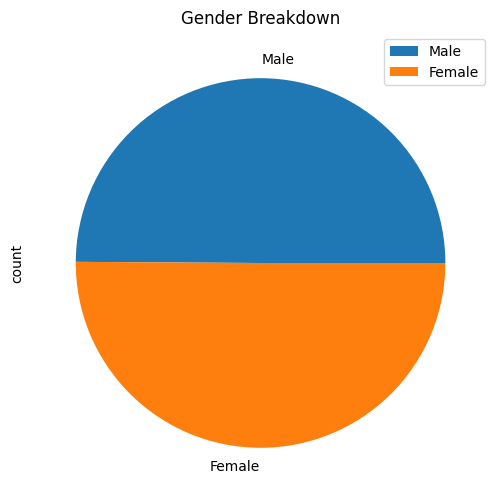

In [37]:
gender_query = "SELECT Gender, COUNT(*) AS count FROM sales GROUP BY Gender ORDER BY count"
gender_df=pd.read_sql_query(gender_query,mydb)
gender_df.set_index(["Gender"], inplace = True)
gender_pie_chart = gender_df.plot.pie(y = "count", figsize = (9,6))
plt.title("Gender Breakdown")


### As a Data Analyst, I want to create **three** visualizations of the DataFrame that include a title and axis titles if applicable:
2. A bar graph of the total number of purchases made in each city

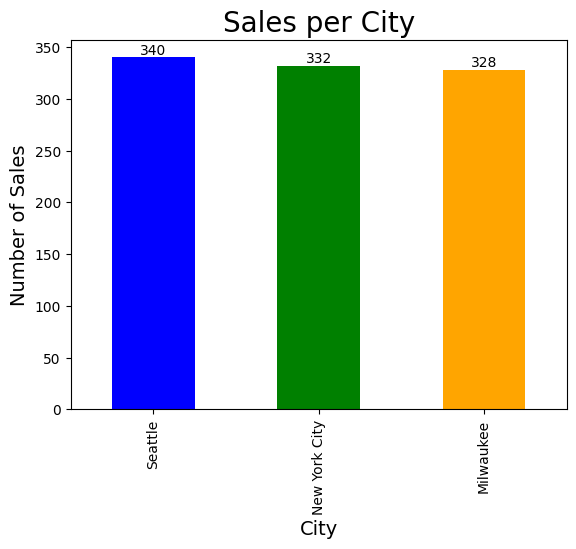

In [77]:
# location_df["City"].value_counts().plot.bar()
city_plot = location_df.plot(kind = "bar", x = "City", y = "count", color = ["blue", "green", "orange"], legend =False)
city_plot.bar_label(city_plot.containers[0])
plt.title("Sales per City", fontsize = 20);
plt.xlabel("City", fontsize = 14);
plt.ylabel("Number of Sales", fontsize = 14);

### As a Data Analyst, I want to create **three** visualizations of the DataFrame that include a title and axis titles if applicable:
3. A comparison of the sales by product line

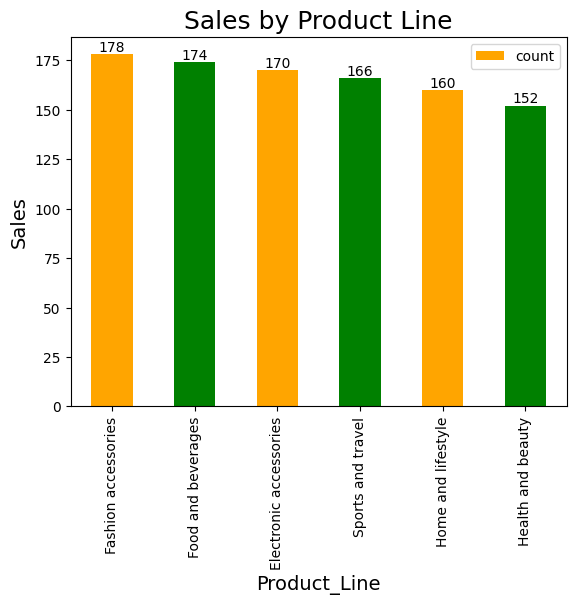

In [96]:
product_bar_chart = product_sales_df.plot.bar(x="Product_Line",y="count", color = ["orange","green"])
product_bar_chart.bar_label(product_bar_chart.containers[0])
plt.title("Sales by Product Line", fontsize = 18);
plt.xlabel("Product_Line", fontsize = 14);
plt.ylabel("Sales", fontsize = 14);

### As a Data Analyst, I want to create **three** visualizations of the DataFrame that include a title and axis titles if applicable:
4. A comparison of the payment types used

C:\Users\jenve\AppData\Local\Temp\ipykernel_40104\2668173733.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  payment_type_df=pd.read_sql_query(payment_query,mydb)


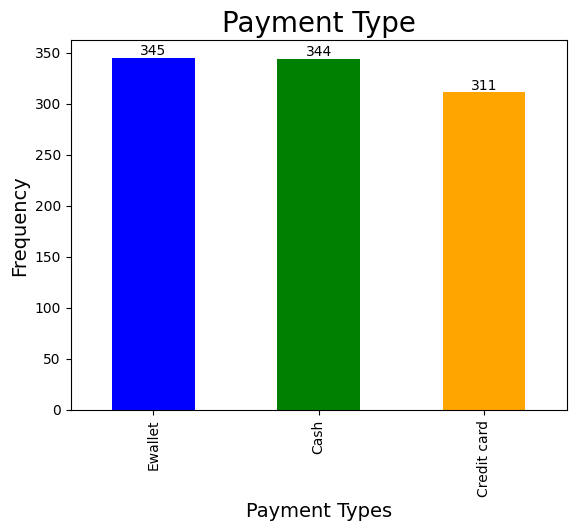

In [86]:
payment_query="SELECT Payment, COUNT(*) AS Count FROM sales GROUP BY Payment ORDER by Count DESC"
payment_type_df=pd.read_sql_query(payment_query,mydb)
payment_type_df

payment_counts = filtered_df["Payment"].value_counts()
payment_plot = payment_counts.plot.bar(color=["blue","green","orange"])
payment_plot.bar_label(payment_plot.containers[0])
plt.title("Payment Type", size = 20);
plt.xlabel("Payment Types", size = 14);
plt.ylabel("Frequency", size = 14);

### As a Data Analyst, I want to describe the numeric trends in my DataFrame

In [98]:
filtered_df.describe()

,Unit_Price,Quantity,Total,Date,COGS,Gross_Income,Rating,City_ID
count,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,322.966749,2019-02-14 00:05:45.600000,307.58738,15.379369,6.97270,1.988000
min,10.080000,1.000000,10.678500,2019-01-01 00:00:00,10.17000,0.508500,4.00000,1.000000
25%,32.875000,3.000000,124.422375,2019-01-24 00:00:00,118.49750,5.924875,5.50000,1.000000
50%,55.230000,5.000000,253.848000,2019-02-13 00:00:00,241.76000,12.088000,7.00000,2.000000
75%,77.935000,8.000000,471.350250,2019-03-08 00:00:00,448.90500,22.445250,8.50000,3.000000
max,99.960000,10.000000,1042.650000,2019-03-30 00:00:00,993.00000,49.650000,10.00000,3.000000
std,26.494628,2.923431,245.885335,NaN,234.17651,11.708825,1.71858,0.817633


### As a Data Analyst, I want to explore the correlation between columns of data

In [122]:
filtered_df.corr(numeric_only = True)
filtered_df.head()


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,Ewallet,42.96,2.1480,6.6,1,Seattle


### As a Data Analyst, I want to create a Linear Regression and model the line of best fit between the data that is most correlated with one another

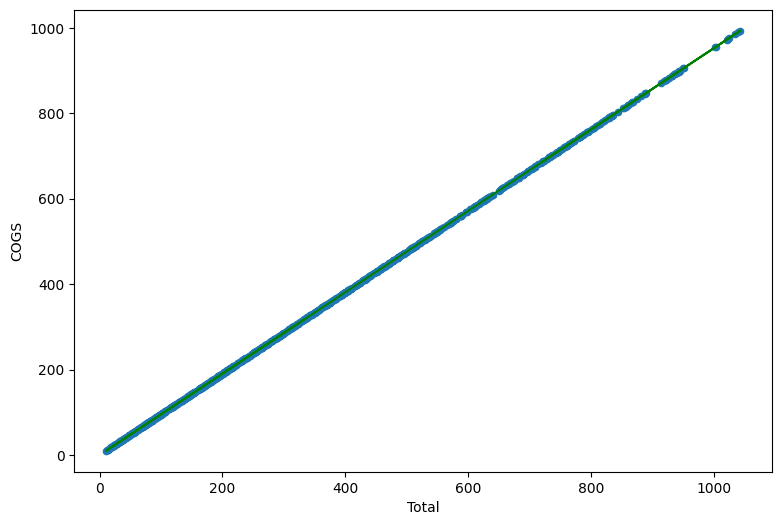

In [123]:
filtered_df.plot.scatter(x = "Total", y = "COGS", figsize = (9,6))
reshaped_x = filtered_df[["Total"]]
reshaped_y = filtered_df["COGS"]
model = LinearRegression()
model.fit(reshaped_x,reshaped_y)
model.predict(reshaped_x)
predicted_gross_income = model.predict(reshaped_x)
plt.plot(reshaped_x,predicted_gross_income, color = "green")